https://www.kaggle.com/code/ryanholbrook/what-is-feature-engineering

Don't forget to add the Concrete Compressive Strength data set...
https://www.kaggle.com/datasets/sinamhd9/concrete-comprehensive-strength

Note that the name and the process of reading it has changed.

Weird.  Internet is off by default, preventing installation of pip modules...
https://stackoverflow.com/questions/58798115/downloading-files-in-kaggle-gives-failed-temporary-failure-in-name-resolutio

In [3]:
# Required (but not specified in the original tutorial) to read the file
!pip install xlrd 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.1 MB/s eta 0:00:00a 0:00:010m


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#df = pd.read_csv("../input/fe-course-data/concrete.csv")
df=pd.read_excel('/kaggle/input/concrete-comprehensive-strength/Concrete_Data.xls',sheet_name='Sheet1')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Not that the data frame keys have changed.  The one I need, compressive strength, has a blank at the very end, which is, of course, required :(

In [5]:
df.keys()

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
X = df.copy()
y = X.pop("Concrete compressive strength(MPa, megapascals) ")

# Train and score baseline model
baseline = RandomForestRegressor(criterion="absolute_error", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 8.397


The new names are too verbose--a hassle.  So I will rename to the versions used by the original (very outdated it appears) tutorial.  I had to rely on manual verification to ensure that the column names corresponded.

In [7]:
new_column_names = df.columns.values.tolist()
tutorial_column_names = ["Cement","BlastFurnaceSlag","FlyAsh","Water",
                         "Superplasticizer","CoarseAggregate","FineAggregate",
                         "Age","CompressiveStrength"]
columns_dict = dict(zip(new_column_names, tutorial_column_names))

df.rename(columns=columns_dict, inplace=True)

df.keys()

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [8]:
X = df.copy()
y = X.pop("CompressiveStrength")

# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

# Train and score model on dataset with additional ratio features
model = RandomForestRegressor(criterion="absolute_error", random_state=0)
score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)
score = -1 * score.mean()

print(f"MAE Score with Ratio Features: {score:.4}")

MAE Score with Ratio Features: 8.01


Just got this dataset working, so I don't want to quit here.  Trying some of the other related tutorials

https://www.kaggle.com/code/sinamhd9/starter-concrete-compressive-strength

In [10]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('white')
sns.set(font_scale=2)

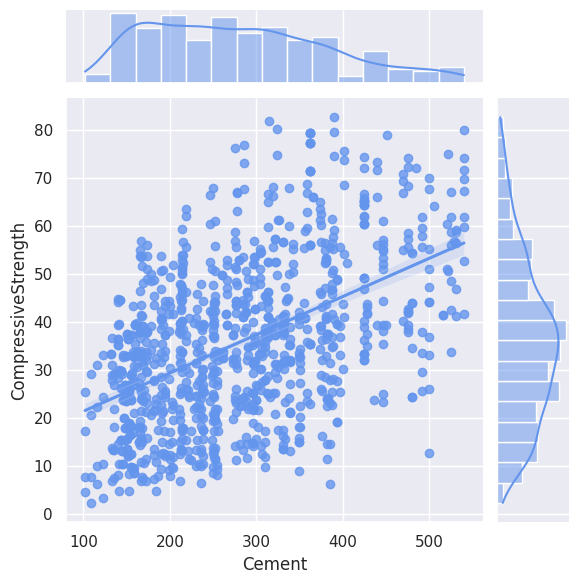

In [16]:
cols = df.columns
color = ['dimgray', 'khaki', 'mediumorchid','cornflowerblue', 'crimson','orangered', 'navy', 'salmon']
sns.set(font_scale=1)

sns.jointplot(data=df, x=cols[0], y=cols[-1]
                  ,kind='reg',color=color[3])
plt.show()

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [14]:
display(df.describe())

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


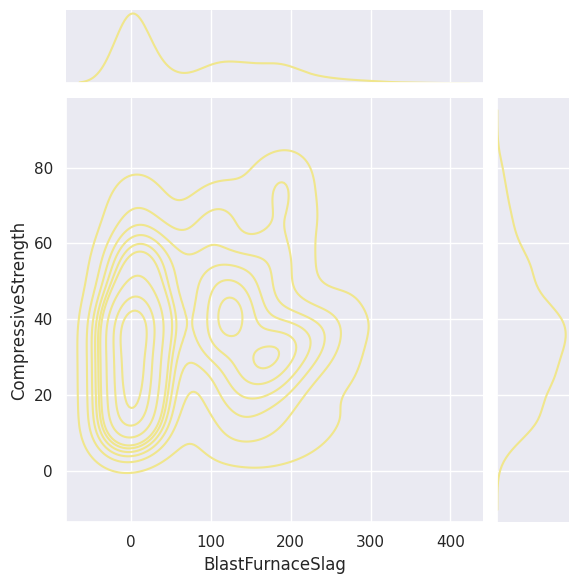

In [15]:
sns.jointplot(data=df, x=cols[1], y=cols[-1]
                  ,kind='kde',color=color[1])
plt.show()

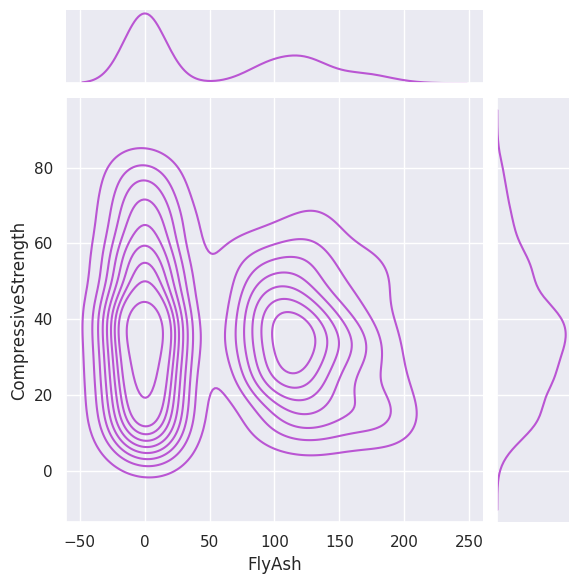

In [17]:
sns.jointplot(data=df, x=cols[2], y=cols[-1]
                  ,kind='kde',color=color[2])
plt.show()

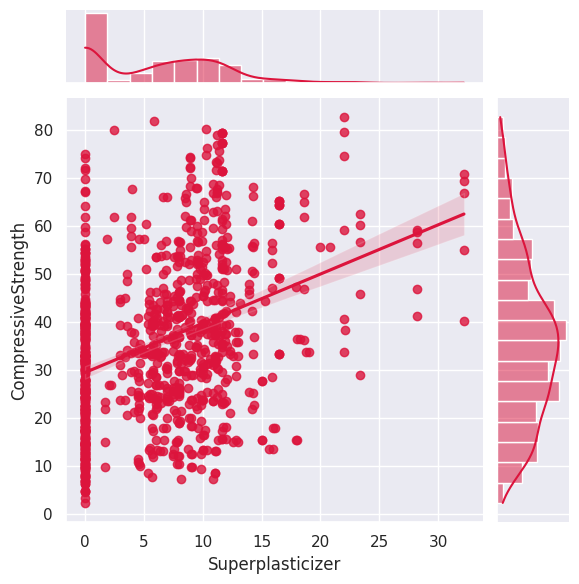

In [18]:
sns.jointplot(data=df, x=cols[4], y=cols[-1]
                  ,kind='reg',color=color[4])
plt.show()

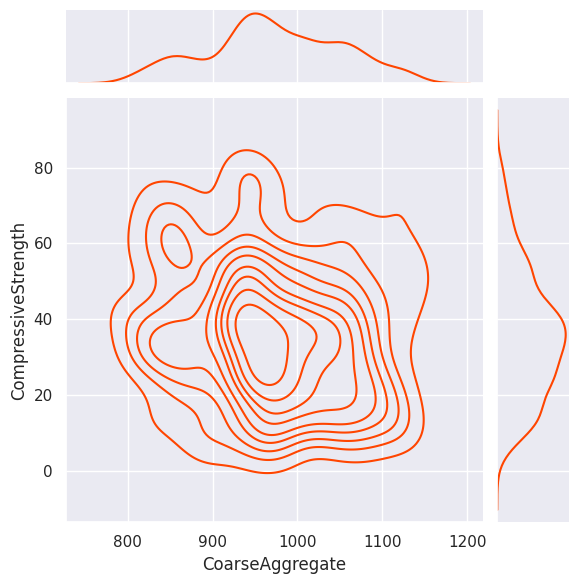

In [19]:
sns.jointplot(data=df, x=cols[5], y=cols[-1]
                  ,kind='kde',color=color[5])
plt.show()

Note that jointplot has changed and you must now pass the fill and thresh variables to fill these plots with color:

https://stackoverflow.com/questions/63842336/seaborn-kde-jointplot-doesnt-have-color-mapping-in-the-latest-version-0-11-0

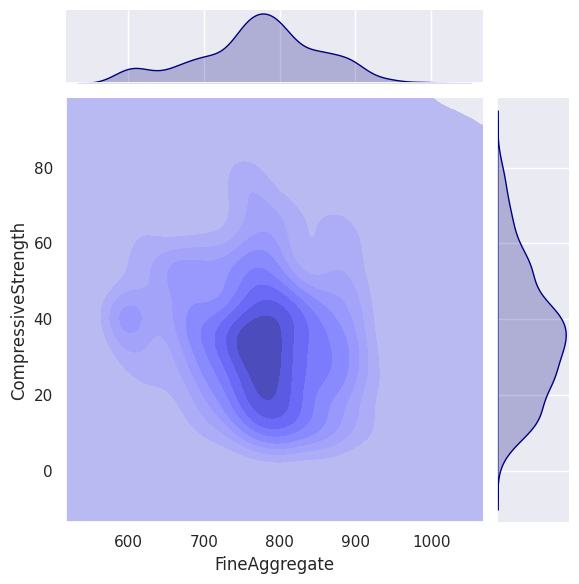

In [21]:
sns.jointplot(data=df, x=cols[6], y=cols[-1]
                  ,kind='kde',color=color[6], fill=True, thresh=0 )
plt.show()

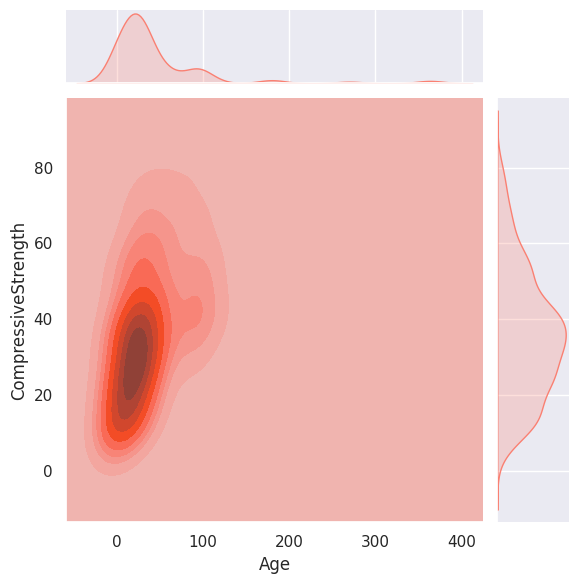

In [22]:
sns.jointplot(data=df, x=cols[7], y=cols[-1]
                  ,kind='kde',color=color[7], fill=True, thresh=0 )
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = pd.DataFrame(columns=cols[:-1], data=sc.fit_transform(df.drop(cols[-1],axis=1)))
display(X.head(3))
y = df[cols[-1]]
display(y.head(3))

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066


0    79.986111
1    61.887366
2    40.269535
Name: CompressiveStrength, dtype: float64

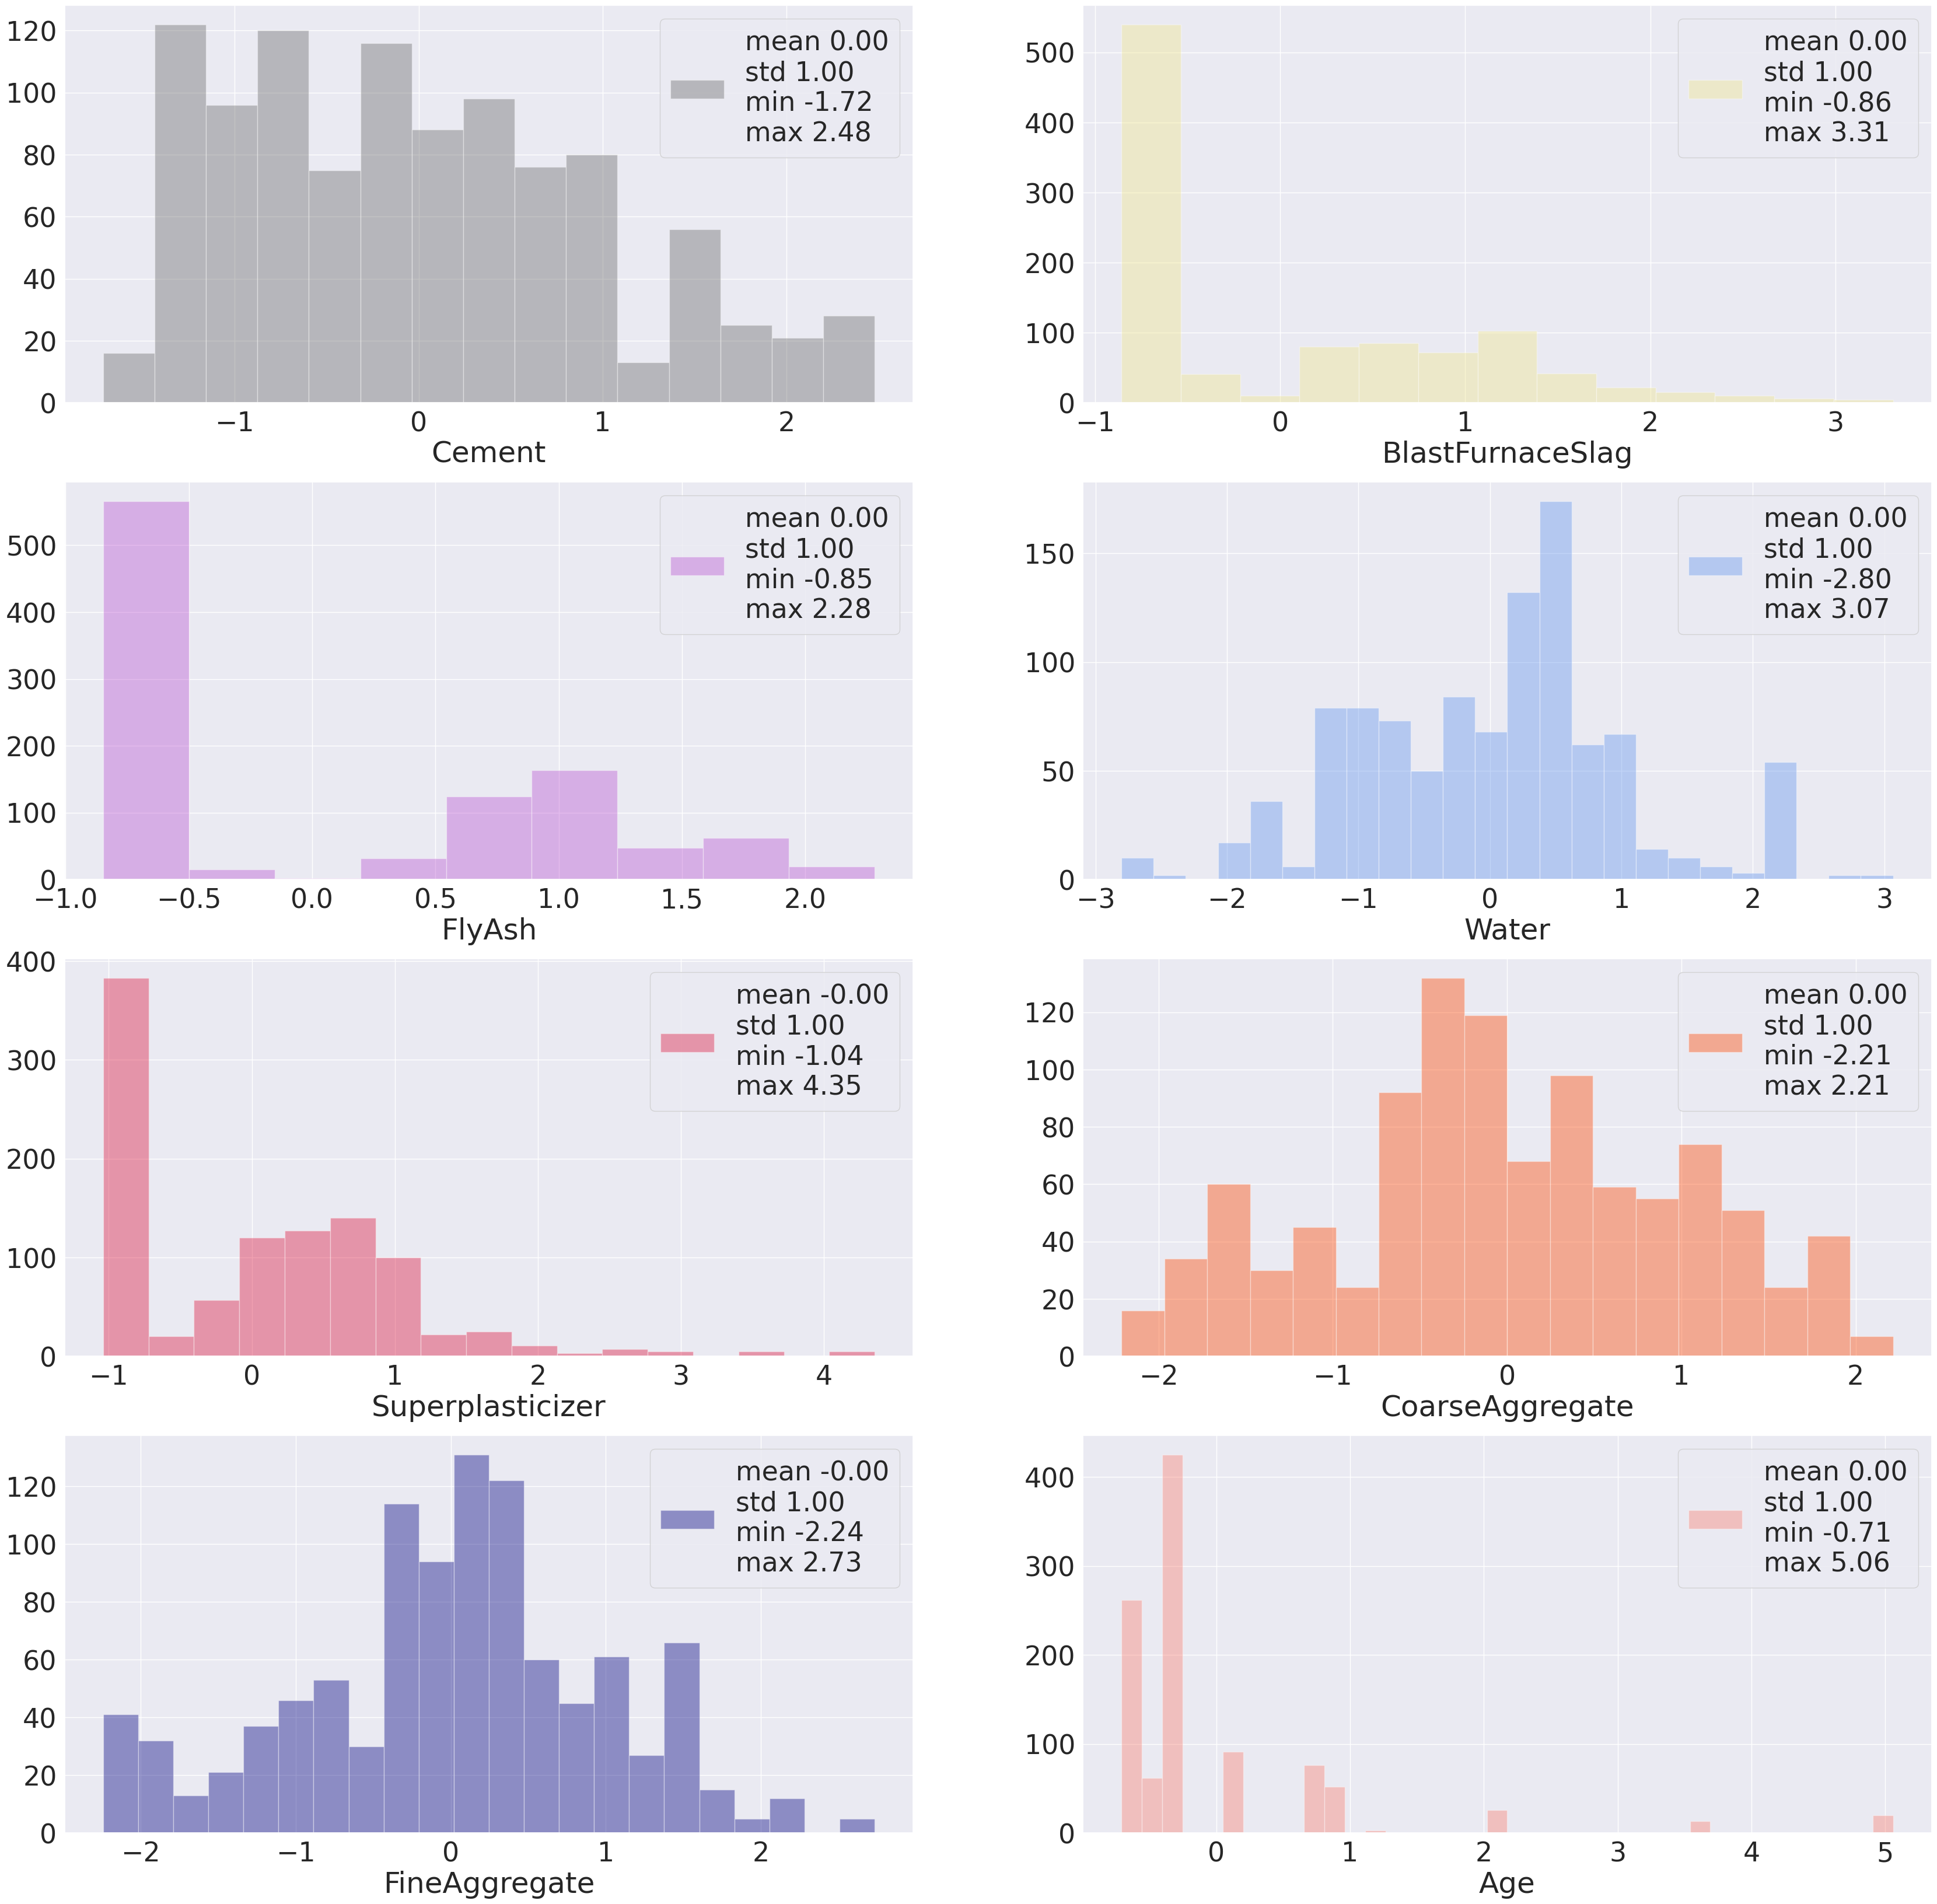

In [24]:
sns.set(font_scale=3)
cols = X.columns
n_row = len(cols)
n_col = 2
n_sub = 1
fig = plt.figure(figsize=(20,40))
for i in range(len(cols)):
    plt.subplots_adjust(left=-0.3, right=1.3, bottom=-0.3, top=1.3)
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(X[cols[i]],norm_hist=False,kde=False, color=color[i],
                 label=['mean '+str('{:.2f}'.format(X.iloc[:,i].mean()))
                        +'\n''std '+str('{:.2f}'.format(X.iloc[:,i].std()))
                        +'\n''min '+str('{:.2f}'.format(X.iloc[:,i].min()))
                        +'\n''max '+str('{:.2f}'.format(X.iloc[:,i].max()))])                                                        
    n_sub+=1
    plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from time import time

def test_models(mlds):
    for i in range(len(mlds)):
        r2 = []
        mae = []
        model = mlds[i]
        n= 0 
        for tr, te in KFold(n_splits=5,random_state=42, shuffle=True).split(X, y):
            st_time = time()
            X_tr = X.iloc[tr, :]
            y_tr = y.iloc[tr]
            X_val = X.iloc[te, :]
            y_val = y.iloc[te]
            model.fit(X_tr, y_tr)
            y_preds = model.predict(X_val)
            r2.append(r2_score(y_val, y_preds))
            mae.append(mean_absolute_error(y_val, y_preds))
            en_time = time()
            print('Time:',str(en_time-st_time),'Fold:',str(n),'r2:',str(r2[n]),'mae:',str(mae[n]))
            n+=1
        print('mean_r2', np.mean(r2))
        print('-----------------------------')

    
seed = 42
models = [LinearRegression(),RandomForestRegressor(random_state=seed, n_jobs=-1),
          XGBRegressor(random_state=seed, n_jobs=-1),LGBMRegressor(random_state=seed,n_jobs=-1)]
test_models(models)

Time: 0.05551719665527344 Fold: 0 r2: 0.6275416055429017 mae: 7.745392872421347
Time: 0.004642486572265625 Fold: 1 r2: 0.5938985928022891 mae: 9.243166303209962
Time: 0.004414081573486328 Fold: 2 r2: 0.5573070483006535 mae: 9.000934122896508
Time: 0.004375457763671875 Fold: 3 r2: 0.6774636293624201 mae: 7.538868889779065
Time: 0.004380464553833008 Fold: 4 r2: 0.5469672475998619 mae: 8.18302949187236
mean_r2 0.6006356247216253
-----------------------------
Time: 0.33402013778686523 Fold: 0 r2: 0.8734396756714482 mae: 3.877487797227313
Time: 0.323589563369751 Fold: 1 r2: 0.9084695642958017 mae: 3.6931461985228062
Time: 0.3142423629760742 Fold: 2 r2: 0.9118687271014672 mae: 3.2031554887207467
Time: 0.3213925361633301 Fold: 3 r2: 0.915040319187414 mae: 3.570731495845092
Time: 0.32290124893188477 Fold: 4 r2: 0.920467788833401 mae: 3.1929609148945923
mean_r2 0.9058572150179064
-----------------------------
Time: 0.21586179733276367 Fold: 0 r2: 0.9230751936264272 mae: 2.9068277183148328
Time:

In [26]:
import tensorflow as tf
from tensorflow.keras import layers

def create_model(hid_layers,num_cols, drop_rate):
    inp = layers.Input(shape=(num_cols,))
    x = layers.BatchNormalization()(inp)
    for i, units in enumerate(hid_layers):
        x= layers.Dense(units, 'relu')(x)
        x = layers.Dropout(drop_rate)(x)
        x = layers.BatchNormalization()(x)

    output = layers.Dense(1, 'linear')(x)
    
    model = tf.keras.models.Model(inputs=inp,outputs=output)
    model.compile(optimizer='adam', loss='mae')
    return model

hid_layers = [300,200,100]
model = create_model(hid_layers, X.shape[1], 0.2)

2024-08-09 08:57:25.930478: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 08:57:25.930583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 08:57:26.184368: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [34]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

def callbacks():
    rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 0, 
                                min_delta = 1e-4, min_lr = 1e-6, mode = 'min')
        
    ckp = ModelCheckpoint(f'.weights.h5', monitor = 'val_loss', verbose = 0, 
                              save_best_only = True, save_weights_only = True, mode = 'min')
        
    es = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, patience = 15, mode = 'min', 
                           baseline = None, restore_best_weights = True, verbose = 0)
    return [rlr, ckp, es]

In [35]:
import tensorflow.keras.backend as K
loss_mae = []
r2_scores = []

fold = 0
for tr, te in KFold(n_splits=5, random_state=42, shuffle=True).split(X,y):
    X_tr = X.iloc[tr, :]
    X_val = X.iloc[te, :]
    y_tr = y.iloc[tr]
    y_val = y.iloc[te]
    history = model.fit(X_tr, y_tr, validation_data=(X_val, y_val), callbacks=callbacks(),
                        epochs=300, verbose=0)
    model.load_weights('.weights.h5')
    y_preds = model.predict(X_val)
    loss_mae.append(mean_absolute_error(y_val, y_preds))
    r2_scores.append(r2_score(y_val, y_preds))
    print(f'fold',str(fold)+':','mae:',loss_mae[fold],'r2_score:',r2_scores[fold])
    K.clear_session()
    fold+=1
print("mae: %0.2f (+/- %0.2f)" % (np.mean(loss_mae), np.std(loss_mae) * 2),'mean_r2:', np.mean(r2_scores))

I0000 00:00:1723194071.310748     305 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
fold 0: mae: 4.640168175767231 r2_score: 0.8651285171523058
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
fold 1: mae: 3.7755215286422277 r2_score: 0.9269729372538513
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
fold 2: mae: 3.5916664450679927 r2_score: 0.9114024609808027
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
fold 3: mae: 3.4898359224768774 r2_score: 0.9255700360247919
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
fold 4: mae: 3.815458146243333 r2_score: 0.8999290523219166
mae: 3.86 (+/- 0.81) mean_r2: 0.9058006007467336
